# Avaliando o retorno dos principais índices de bolsas ao redor do mundo

O objeto é avaliar o retorno semanal, após o fechamento do pregão de sexta-feira e também do último ano.

Também criei uma visão com a análise do último ano e uma outra em que é possível avaliar de acordo com o período de preferência.

Para isso será utilizado as bibliotecas:
- pandas
- yahoo finance
- matplotlib
- plotly
- datetime
- get_prices

A biblioteca get_prices eu criei para reaproveitar o código para pegar as cotações e tratar o dataframe para o formato necessário para a nossa análise.

Também ajustei o options.display.float_format do pandas já que muitos índices tem valores extremamente elevados e o pandas acabava exibindo-os com notação científica e pode acabar dificultando o entendimento

## Importando as bibliotecas

In [12]:
import pandas as pd
import time
inicio = time.time()
import yfinance as yf
from datetime import timedelta, date
from get_stock_prices import get_prices
from plot import plotly_plot as pp
from plot import matplotlib_plot as mp

pd.options.display.float_format = '{:.5f}'.format

## Criando o dicionário com os indicadores e definindo a data

Se quiser adicionar um novo índice, basta adicionar no final da variável **indicadores**, que é um dicionário que guarda os indicadores e sua respectiva sigla na base de dados do yahoo finance. Utilizar o formato:

```python
"Nome do Índice": "Codigo"
```
Se necessário, utilizar o site https://finance.yahoo.com/ para pesquisar o código. Ele se encontra no final da barra de endereço ou entre parentêses após o nome do índice.

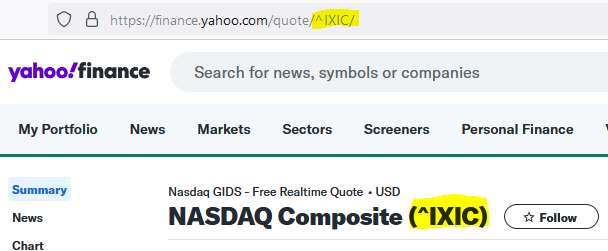

Além disso, utilizei a biblioteca **datetime** para pegar a data atual (considerando que estamos rodando numa sexta-feira) e a **timedelta** para voltar 4 dias (segunda-feira) e utilizar esse valor na hora de buscar os preços da semana.

In [13]:
today = date.today()
delta = timedelta(days=5)

monday = (today - delta).strftime('%Y-%m-%d')

indicadores = {
    "Ibovespa": "^BVSP",
    "Nasdaq": "^IXIC",
    "S&P 500": "^GSPC",
    "Dow Jones": "^DJI",
    "FTSE 100": "^FTSE",
    "ESTX 50 PR.EUR": "^STOXX50E",
    "EURONEXT 100": "^N100",
    "Merval": "^MERV",
    "Nikkei 225": "^N225",
    "CSI 300": "000300.SS"
    }

nomes_indicadores = [nome for nome in indicadores.keys()]
tickers_indicadores = [ticker for ticker in indicadores.values()]

## Baixando os dados para a análise semanal

Irei utilizar a biblioteca **get_prices**, passando como parametro a lista com os tickers dos indicadores que queremos analisar e a data de inicio da análise.

Após isso, iremos usar a função **map()**, passando o dicionário *indicadores_trocar* e substituir os valores da coluna Ticker pelo nome do índice.

Esse dicionário tem o formato inverso do dicionários indicadores, por isso, usamos a funçao zip() dentro da função dict(), para criarmos um dicionário com a lista de tickers como chaves e o nome dos indicadores como valor.

O valor dele será basicamente esse:
</br>
```python
 {
    '^BVSP':'Ibovespa',
    '^IXIC':'Nasdaq',
    '^GSPC':'S&P 500',
    '^DJI':'Dow Jones',
    '^FTSE':'FTSE 100',
    '^STOXX50E':'ESTX 50 PR.EUR',
    '^N100':'EURONEXT 100',
    '^MERV':'Merval',
    '^N225':'Nikkei 225',
    '000300.SS':'CSI 300'
 }

```
No final, ordenaremos o dataframe pela coluna Data.

In [14]:
week_prices = get_prices(tickers_indicadores, monday)
indicadores_trocar = dict(zip(tickers_indicadores, nomes_indicadores))

week_prices['Índice'] = week_prices['Índice'].map(indicadores_trocar)

week_prices.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Índice,Date,Preço,Normalizado
37,Nikkei 225,2025-01-20,38671.76953,1.00000
38,Nikkei 225,2025-01-21,39027.98047,1.00921
39,Nikkei 225,2025-01-22,39646.25000,1.02520
40,Nikkei 225,2025-01-23,39958.87109,1.03328
41,Nikkei 225,2025-01-24,39931.98047,1.03259
42,CSI 300,2025-01-20,3835.30005,1.00000
43,CSI 300,2025-01-21,3832.61011,0.99930
44,CSI 300,2025-01-22,3797.02002,0.99002
45,CSI 300,2025-01-23,3803.73999,0.99177
46,CSI 300,2025-01-24,3832.86011,0.99936


## Criando o dataframe com os dados para análise anual

As premissas serão basicamente as mesmas da análise anterior, mudando apenas o valor da variável **start_date** dentro da função yf.download() para uma data de um ano atrás.

In [15]:
year = (today-timedelta(365)).strftime('%Y-%m-%d')

year_prices = get_prices(tickers_indicadores, year)
year_prices['Índice'] = year_prices['Índice'].map(indicadores_trocar)


year_prices.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Índice,Date,Preço,Normalizado
2477,CSI 300,2025-01-13,3722.51001,1.11900
2478,CSI 300,2025-01-14,3820.54004,1.14846
2479,CSI 300,2025-01-15,3796.03003,1.14110
2480,CSI 300,2025-01-16,3800.37988,1.14240
2481,CSI 300,2025-01-17,3812.34009,1.14600
2482,CSI 300,2025-01-20,3829.67993,1.15121
2483,CSI 300,2025-01-21,3832.61011,1.15209
2484,CSI 300,2025-01-22,3797.02002,1.14139
2485,CSI 300,2025-01-23,3803.73999,1.14341
2486,CSI 300,2025-01-24,3832.86011,1.15217


### Plotando o gráfico

* 1\. Usamos a função **matplotlib_plot()** da biblioteca **plot**, que foi criada para caso queiramos reaproveitar os gráficos.
    * 1.1\. Passamos como parametros a lista com o nome dos indicadores, o dataframe, o nome da coluna com o nome dos indicadores para o nome dos labels, o nome da coluna da data para o eixo **x**, o nopme da coluna com os preços normalizados para o eixo **y**.
    * 1.2\. Os dois últimos parametros são opcionais. O estilo padrão é o ggplot e o grid é definido como False.
* 2\. Caso queira mudar alguma outra propriedade do gráfico, ajustar diretamente dentro da função **matplotlib_plot** localizada no arquivo **plot.py** de acordo com suas preferências.
* 3\. Caso queira mudar o estilo do gráfico, rodar o comando: **plot.mp_styles()**

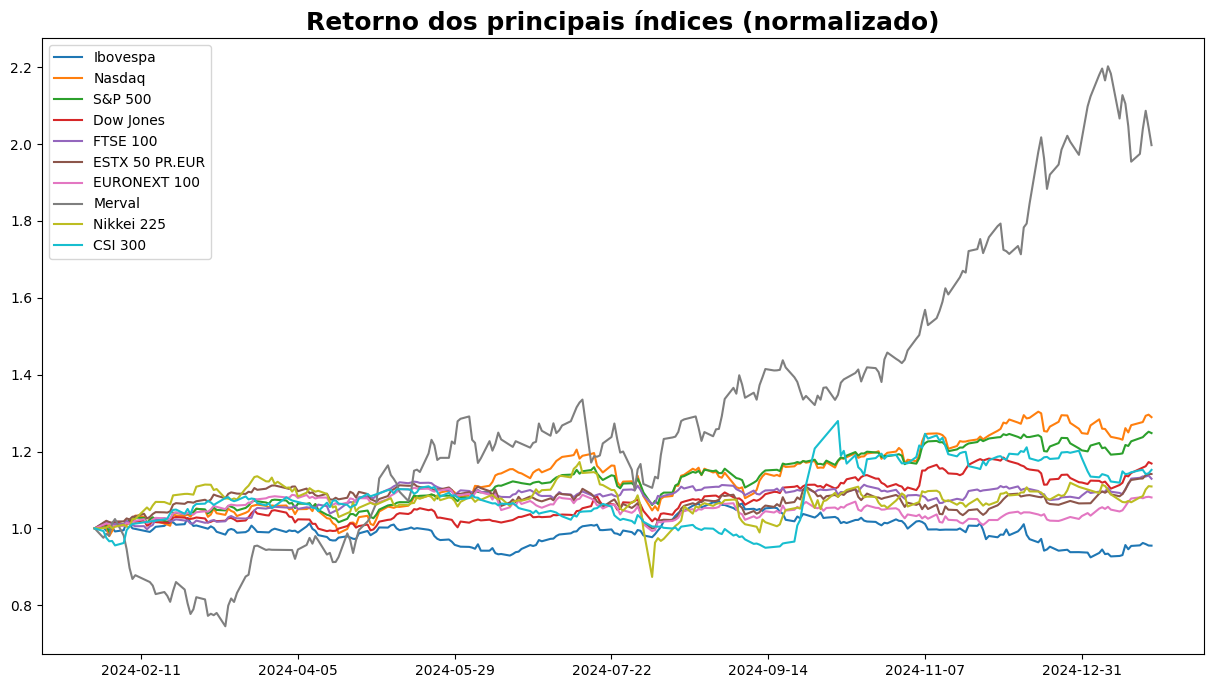

In [16]:
mp(nomes_indicadores, year_prices, 'Índice', 'Date', 'Normalizado', 'seaborn-v0_8-darkgrid', grid=True)

### Utilizando o plotly express

Como muitos dos índices acabam tendo um retorno próximos e as linhas ficam sobrepostas durante boa parte do período, uma opção interessante para lidarmos com essa situação é utilizar o plotly express. Com ele temos um gráfico dinâmico onde podemos tanto passar o mouse e visualizar os detalhes para aquela data e ticker que estamos com selecionando com o mouse, como também podemos selecionar quais tickers irão aparecer no gráfico com apenas um clique diretamente na legenda. 

Além disso, podemos também selecionar períodos diretamente no gráfico para analisarmos com mais detalhes.

Para isso, iremos utilizar a função **plotly_plot()** da biblioteca **plot**, que ira retornar o gráfico já estilizado. 

* 1\. Rodamos a função plotly_plot passando com os parametros:
    * 1.1\. O dataframe
    * 1.2\. A coluna Date para o eixo **x**
    * 1.3\. A coluna Normalizado para o eixo **y**
    * 1.4\. A coluna Índice para o **color**
    * 1.5\. A variável title para o título do gráfico
    * 1.6\. A variável ytitle para o título do eixo **y**
* 2\. Podemos mudar os valores das variávels **title** e **ytitle** de acordo com o que acharmos mais conveniente.

Caso queira mudar alguma outra propriedade do gráfico, ajustar diretamente dentro da função **plotly_plot** localizada no arquivo **plot.py** de acordo com suas preferências.

In [17]:
title='<b>Retorno dos principais índices (normalizado)</b>'
ytitle='Preço Normalizado'

pp(year_prices, x='Date', y='Normalizado', color='Índice', title=title, ytitle=ytitle)

## Analisando um período maior 

As premissas serão basicamente as mesmas da análise anterior, mudando apenas o valor da variável **start_date** e da **end_date**. Caso não seja passado valor para a end_date, o valor padrão será a data atual.

- Colocar a data dentro do **get_prices** no formato **'AAAA-MM-DD'**

In [18]:
prices_df = get_prices(tickers_indicadores, start_date='2010-01-01', end_date='2020-12-31')

prices_df['Índice'] = prices_df['Índice'].map(indicadores_trocar)

prices_df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Índice,Date,Preço,Normalizado
34809,CSI 300,2025-01-13,3722.51001,0.74086
34810,CSI 300,2025-01-14,3820.54004,0.76037
34811,CSI 300,2025-01-15,3796.03003,0.75550
34812,CSI 300,2025-01-16,3800.37988,0.75636
34813,CSI 300,2025-01-17,3812.34009,0.75874
34814,CSI 300,2025-01-20,3829.67993,0.76219
34815,CSI 300,2025-01-21,3832.61011,0.76278
34816,CSI 300,2025-01-22,3797.02002,0.75569
34817,CSI 300,2025-01-23,3803.73999,0.75703
34818,CSI 300,2025-01-24,3832.86011,0.76283


In [19]:
title = '<b>Retorno dos principais índices (normalizado)</b>'
ytitle = 'Preço Normalizado'

pp(prices_df, x='Date', y='Normalizado', color='Índice', title=title, ytitle=ytitle)

In [20]:
fim = time.time()

print(f'O script rodou em {fim-inicio:.2f} segundos')

O script rodou em 48.48 segundos
